-----COMPTE RENDU TP 4 MBODE JOSEPH ----------------

Ce TP a pour objectif de segmenter des images microscopiques par le biais de l’algorithme 
d’apprentissage « RandomForestRegressor ». Vous travaillerez sur les images « sandstone ».  

A)  Prise en main des images 

Vous êtes amenés à travailler sur les données disponibles dans les deux fichiers comprimés : 
« Train_images.zip » et « Train_masks.zip ». Analysez le contenu de ces fichiers.

B) Extraction des attributs et préparation du jeu de données


1- importation librairies

In [88]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

2-lecture de image Sandstone_Versa0000.tif

In [89]:
Img = cv2.imread('Train_images/Sandstone_Versa0000.tif')

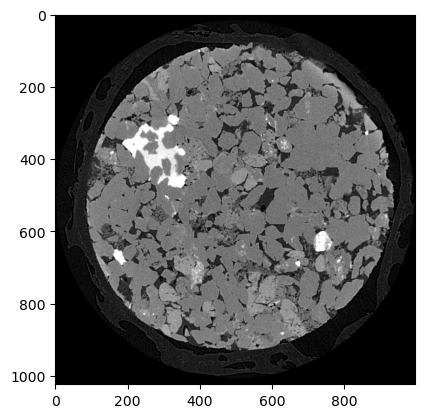

In [90]:
#cv2.imshow('Sandstone_Versa0000',Img)
plt.imshow(Img)

In [91]:
#conversion de RGB en niveau de gris
Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)

In [92]:
#Transformation en signal 1D
Img2=Img.reshape(-1)


3-prepa du jeu de données d'entrainement dans le dataframe df

    a)commentaire sur les lignes

In [93]:
df = pd.DataFrame() #creation du dataframe df
df['Original Imag']=Img2 #ce dataframe sera nommé 'Original Imag' avec les valeurs de la matrice image Img2
print(df.head) #affiche les 5 premières et 5 dernières lignes de df

<bound method NDFrame.head of          Original Imag
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
1019899              0
1019900              0
1019901              0
1019902              0
1019903              0

[1019904 rows x 1 columns]>


    b) Opération de filtrage Gabor pour créer des attributs à l'image

In [94]:
num=1
kernels = [] #liste de kernels Gabor

#application sur les différents paramètres deu Gabor
for theta in range(2): #pour theta allant de 0 à 1
    theta = theta/4. *np.pi # chaque theta devient (theta/4) puissance pi
    for sigma in (1,3): #pour chaque lamda de sigma(l'écart-type)  1 et 3
        for lamda in np.arange(0,np.pi,np.pi/4): #on aura chaque valeur de lamda qui varirait de 0 à pi avec un pas de pi/4
            for gamma in (0.05,0.5): #et pour chaque nouvelle valeur de lamda, on observe pour 
                                    #chaque gamma (longleur spatial de l'éllipse) entre 0.05 et 0.5 
                gabor_label = 'Gabor'+str(num) #nom du kernel actuel
                print(gabor_label)            #affichage du nom
                ksize=9    #sa taille, donc ici 9x9
                kernel = cv2.getGaborKernel((ksize,ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)#génération du kernel GABOR
                kernels.append(kernel)#ajout à la liste de kernel pour chaque valeur de gamma
                fimg=cv2.filter2D(Img2,cv2.CV_8UC3,kernel)#filtrage avec Kernel Gabor sur Img2
                filtered_img=fimg.reshape(-1) #affectation de l'image filtrée à un vecteur unidimmensionnel
                #ajout des nouvelles valeurs au datafram
                df[gabor_label]=filtered_img #creer une nouvelle coonne gabor_label qui prend les valeur de vecteur filtered_img
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=',lamda, ': gamma=', gamma) #affichage des paramètres utilisés pour le kernel actuem
                num+=1 #incrémentation au kernel prochain

Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14
Gabor14 : th

    c) ajout des attributs et commentaires du code

In [95]:
edges = cv2.Canny(Img,100,200) # Application du détecteur de contours de Canny de OpenCV
edges1=edges.reshape(-1)    # Transforme du tableau 2D de contours en 1D
df['Canny Edge'] = edges1  # Ajout de la colonne 'Canny Edge' au DataFrame

from skimage.filters import roberts, sobel, scharr, prewitt # Importation des filtres de détection de contours de scikit-image

# Détection de contours avec l'opérateur de Roberts
edge_roberts = roberts(Img)
edge_roberts1=edge_roberts.reshape(-1)
df['Robert'] = edge_roberts1

# Détection de contours avec l'opérateur de Sobel
edge_sobel = sobel(Img)
edge_sobel1=edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

# Détection de contours avec l'opérateur de Scharr
edge_scharr= scharr(Img)
edge_scharr1=edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

# Détection de contours avec l'opérateur de Prewitt
edge_prewitt= prewitt(Img)
edge_prewitt1=edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1


from scipy import ndimage as nd # Importation du module de filtrage de scipy

# Application d'un filtre gaussien avec sigma = 3
gaussian_img = nd.gaussian_filter(Img,sigma = 3)
gaussian_img1=gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

# Application d'un filtre gaussien avec sigma = 7
gaussian_img2 = nd.gaussian_filter(Img,sigma = 7)
gaussian_img3=gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

# Application d'un filtre médian de taille 3
median_img = nd.median_filter(Img,size=3)
median_img1=median_img.reshape(-1)
df['Medians3'] = median_img1

    d) jeu de labels et commentaires

In [96]:
labeled_img=cv2.imread('Train_masks/Sandstone_Versa0000.tif')# Lecture d'une image du masque Sandstone_Versa0000.tif 

# Conversion de l'image de l'espace couleur BGR (par défaut avec OpenCV) 
# vers l'espace de niveaux de gris
labeled_img=cv2.cvtColor(labeled_img,cv2.COLOR_BGR2GRAY)

labeled_img1=labeled_img.reshape(-1)# Transformation du tableau 2D de l'image en tableau 1D 

df['Labels']=labeled_img1# Ajout du tableau 1D comme nouvelle colonne dans le DataFrame 

    e) Entrainement des données pour la variable X et les labels Y

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X=df.drop('Labels', axis=1) # le dataframe df sans Labels
y=df['Labels'] #la colonne Labels du df

#Division des données :
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

C) Entrainement du modèle 

1- application du RandomForestRegressor

In [99]:
from sklearn.ensemble import RandomForestClassifier #importation de la librairie RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42) # création du modèle

2- entrainement d modèle

In [100]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

3-Test sur les données de test

In [101]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model.score(X_test,y_test)

0.9835523896833529

4-Analyse de la précision du modèle 

In [102]:
from sklearn import metrics #importation de a librairie pour la fonction accuracy

print("Train accuracy:", metrics.accuracy_score(y_train, y_train_pred)) #précision des données d'entrainement et prdites
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred)) #précision des données de test et prédites

Train accuracy: 0.9999975487883048
Test accuracy: 0.9835523896833529


5- Analyse des attributs dans ce code

In [103]:
# Convertit les noms des colonnes du DataFrame X en une liste
# Cette liste contiendra les noms des attributs utilisés pour l'entraînement
features_list=list(X.columns)

# Crée une série pandas avec les importances des caractéristiques 
# - model.feature_importances_ contient les scores d'importance de chaque attribut
# - index=features_list associe chaque score à son nom de caractéristique
# - .sort_values(ascending=False) trie les importances par ordre décroissant
feature_imp=pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)

# Affiche les importances des caractéristiques triées
# Les caractéristiques en haut de la liste sont les plus importantes pour le modèle
print(feature_imp)

Gabor4           1.392620e-01
Gaussian s3      1.061857e-01
Gabor8           9.547450e-02
Medians3         9.348843e-02
Gabor6           8.627764e-02
Gabor7           7.038280e-02
Gabor12          5.624742e-02
Gabor5           5.567677e-02
Gabor24          4.795002e-02
Original Imag    4.585922e-02
Gabor23          3.357505e-02
Gaussian s7      3.312794e-02
Gabor22          1.817624e-02
Gabor30          1.779038e-02
Gabor21          1.674581e-02
Gabor11          1.670068e-02
Gabor29          1.160742e-02
Gabor31          1.052984e-02
Prewitt          9.275611e-03
Sobel            9.189065e-03
Gabor3           8.172940e-03
Scharr           8.089621e-03
Robert           5.602177e-03
Gabor32          3.547329e-03
Canny Edge       9.416878e-04
Gabor20          1.159343e-04
Gabor28          6.909043e-06
Gabor27          9.335762e-07
Gabor19          2.045681e-08
Gabor2           0.000000e+00
Gabor10          0.000000e+00
Gabor26          0.000000e+00
Gabor1           0.000000e+00
Gabor18   

D) Sauvegarde du modèle 

In [104]:
import pickle #importation du module pour sauvegarder les modèles du machine learning ( sérialiser et désérialiser les objets)
filename ="sandstone_model" #créattion d'un som de sauvegarde

# Sauvegarde du modèle sur le disque
# - pickle.dump() sérialise l'objet (ici 'model')
# - open(filename, 'wb') ouvre le fichier en mode écriture binaire
#   'w' pour écriture, 'b' pour mode binaire (nécessaire pour pickle)
# Cette méthode permet de conserver tous les paramètres et l'état du modèle
pickle.dump(model,open(filename,'wb'))

E) Test du modèle sr les nouvelles données

1-Telecharger le nouveau modèle

In [110]:
loaded_model=pickle.load(open(filename,'rb'))
result = loaded_model.predict(X)

2- redimensisonnement de l'image

In [111]:
segmented = result.reshape((Img.shape))

3-Affichage de l'image segmentée

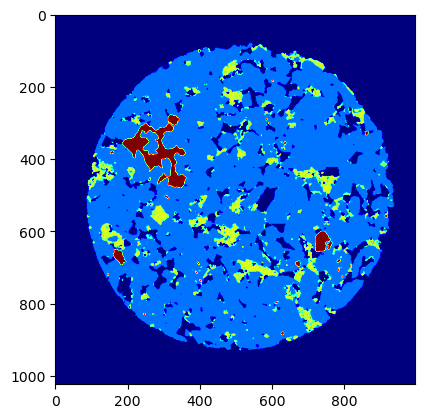

In [112]:
plt.imshow(segmented,cmap='jet')
plt.imsave('segmented_rock_RF_100_estim.jpg',segmented,cmap='jet')

4- comparaison avec l'image dans mask

In [113]:
Img_2=cv2.imread('Train_masks/Sandstone_Versa0000.tif')

Text(0.5, 1.0, 'image dans Mask')

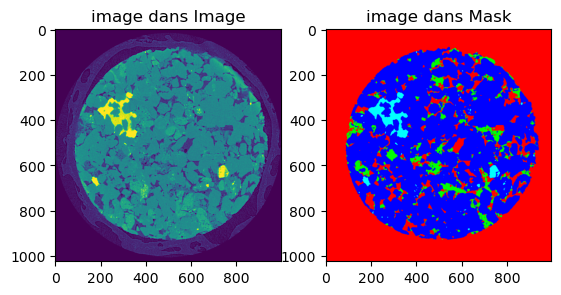

In [114]:
plt.subplot(1,2,1)
plt.imshow(Img)
plt.title('image dans Image')
plt.subplot(1,2,2)
plt.imshow(Img_2)
plt.title('image dans Mask')